In [268]:
import pandas as pd
import re
from nltk.corpus import stopwords
import nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [269]:
dataset = pd.read_excel('D:/MSC/UHull/COURSE/WEEK10-NLP/IMDB Dataset.xlsx')
dataset.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [270]:
dataset['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

**Exploratory Data Analysis**
* Checking Shape
* Checking Count

In [271]:
dataset.shape

(50000, 2)

In [272]:
dataset.groupby('sentiment').size()

sentiment
negative    25000
positive    25000
dtype: int64

**Data Cleaning**

In [273]:
dataset_review = dataset
dataset_review

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


**Remove html tags**

In [274]:
def rem_html(text):
    return re.sub(r'<.*?>', ' ', text)
dataset_review['review'] = dataset_review['review'].apply(rem_html)
print(dataset_review)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production.   The filming t...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


**Remove Special Character**

In [275]:
# text = "Hello, World! This is NLP 101. Let's clean it up."
def rem_special(text): 
    return re.sub(r'[^A-Za-z0-9\s]', '', text)
dataset_review['review'] = dataset_review['review'].apply(rem_special)
# dataset_review = re.sub(r'[^A-Za-z0-9\s]', '', str(dataset_review))
print(dataset_review)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production   The filming te...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically theres a family where a little boy J...  negative
4      Petter Matteis Love in the Time of Money is a ...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot bad dialogue bad acting idiotic direc...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  Im going to have to disagree with the previous...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


**Remove all kinds of bracket**

In [276]:
# dataset_review = re.sub(r'[\[\]\{\}\(\)]', '', str(dataset_review))
def rem_bracket(text): 
    return re.sub(r'[\[\]\{\}\(\)]', '', text)
dataset_review['review'] = dataset_review['review'].apply(rem_bracket)
print(dataset_review)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production   The filming te...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically theres a family where a little boy J...  negative
4      Petter Matteis Love in the Time of Money is a ...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot bad dialogue bad acting idiotic direc...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  Im going to have to disagree with the previous...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


**Remove Stop Words**

In [277]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
dataset_review['review'] = dataset_review['review'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
print(dataset_review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gito_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                  review sentiment
0      One reviewers mentioned watching 1 Oz episode ...  positive
1      wonderful little production filming technique ...  positive
2      thought wonderful way spend time hot summer we...  positive
3      Basically theres family little boy Jake thinks...  negative
4      Petter Matteis Love Time Money visually stunni...  positive
...                                                  ...       ...
49995  thought movie right good job wasnt creative or...  positive
49996  Bad plot bad dialogue bad acting idiotic direc...  negative
49997  Catholic taught parochial elementary schools n...  negative
49998  Im going disagree previous comment side Maltin...  negative
49999  one expects Star Trek movies high art fans exp...  negative

[50000 rows x 2 columns]


**Transform all Letters to Lowercase**

In [278]:
dataset_review['review'] = dataset_review['review'].str.lower()
print(dataset_review) # This is final cleaned dataset

                                                  review sentiment
0      one reviewers mentioned watching 1 oz episode ...  positive
1      wonderful little production filming technique ...  positive
2      thought wonderful way spend time hot summer we...  positive
3      basically theres family little boy jake thinks...  negative
4      petter matteis love time money visually stunni...  positive
...                                                  ...       ...
49995  thought movie right good job wasnt creative or...  positive
49996  bad plot bad dialogue bad acting idiotic direc...  negative
49997  catholic taught parochial elementary schools n...  negative
49998  im going disagree previous comment side maltin...  negative
49999  one expects star trek movies high art fans exp...  negative

[50000 rows x 2 columns]


In [279]:
dataset_review['review'][0] # checking result

'one reviewers mentioned watching 1 oz episode youll hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle class inm

**Create Bag of Words Encoder  and Vectorization**

**Encode Sentiment**

In [280]:
encoder = LabelEncoder()
dataset_review['sentiment'] = encoder.fit_transform(dataset_review['sentiment'])
dataset_review['sentiment'].value_counts()
# 1 positive review and 0 negative review

sentiment
1    25000
0    25000
Name: count, dtype: int64

**Create Bag of Words**

In [281]:
cv = CountVectorizer(max_features = 1000,binary = True)
x = cv.fit_transform(dataset_review['review']).toarray()
y = dataset_review['sentiment'].values

**Train Model**

In [282]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1) # split train and test data and to use random state for reproducible results

**Fit Model with Naive Bayes**

In [283]:
naiveBayes = MultinomialNB()
naiveBayes.fit(x_train,y_train)

MultinomialNB()

**Test Model**

In [284]:
prediction = naiveBayes.predict(x_test)

In [285]:
prediction # predicted values

array([0, 0, 0, ..., 0, 1, 0])

**Performance Metrics - Confusion Matrix**

In [286]:
cm = confusion_matrix(y_test,prediction)
cm # Confusion matrix Result

array([[4180,  864],
       [ 781, 4175]], dtype=int64)

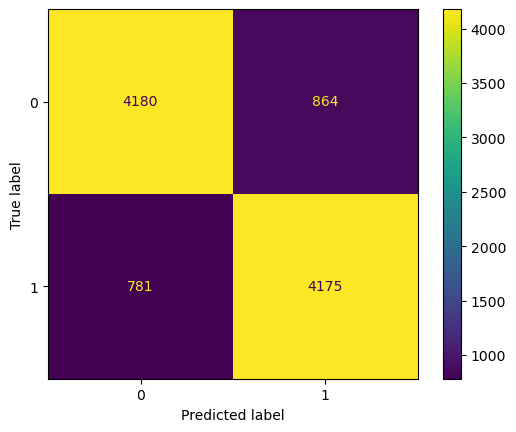

In [287]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
import matplotlib.pyplot as plt
plt.show()


**Performance Metrics - Accuracy**

In [288]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, prediction)
accuracy

0.8355

**All Metrics Based on Confusion Matrix**
1. Accuracy = (TP+TN)/(TP+FP+TN+FN)
2. Precission = TP/(TP+FP)
3. Recall = TP/(TP+FN)

In [289]:
Acc = (4175+4180)/(4175+4180+781+864)
Prec = 4175/(4175+864)
Recall = 4175/(4175+781)
print('accuracy :', Acc,',Precission :', Prec, ',Recall :', Recall)

accuracy : 0.8355 ,Precission : 0.8285374082159158 ,Recall : 0.8424132364810331


**Create Word Cloud**

In [290]:
# Adding More Stop Words since its common in both positive and negative reviews
stop_words2= ['myself', 'ours', 'ourselves', "you're", "you've", "you'll", "you'd", 
 'your', 'yours', 'yourself', 'yourselves', 'himself', "she's", 'hers', 'herself', 
  "it's", 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
  'whom', 'this', 'that', "that'll", 'these', 'those', 'were', 'been', 'being', 
  'have', 'having', 'does', 'doing', 'until', 'while', 'with', 'about', 'between',
  'into', 'through', 'during', 'before', 'after', 'above', 'below', 'from', 'down', 
  'over', 'under', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 
  'both', 'each', 'more', 'most', 'other', 'some', 'such', 'only', 'same', 'than', 
  'will', 'just','not','youve', 'youd', 'youll', 'youre', 'youve','yes','yet','no']


**Positive Word Cloud**

In [291]:
dataset_review_positive = dataset_review[dataset_review['sentiment'] == 1]
dataset_review_negative = dataset_review[dataset_review['sentiment'] == 0]

In [292]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [293]:
cv_positive = CountVectorizer(max_features = 1000,binary = True)
cv_positive.fit_transform(dataset_review_positive['review'])


<25000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 1324481 stored elements in Compressed Sparse Row format>

In [294]:
df_positive= pd.DataFrame(cv_positive.vocabulary_.items(),columns=['word','count'])
df_positive.sort_values(by='count',ascending=False).head(10)

,word,count
287,youve,999
304,youre,998
614,younger,997
121,young,996
4,youll,995
146,york,994
510,yet,993
296,yes,992
116,years,991
336,year,990


In [295]:
# Filter out more words like youve, youd, youll, youre, youve, yes, yet, no since its common on positive and negative reviews and filter > 10 characters words
df_positive = df_positive[~df_positive['word'].isin(stop_words2)] 
df_positive = df_positive[df_positive['word'].str.len() > 10]
df_positive = df_positive.sort_values(by='count', ascending=False)

In [296]:
df_positive2.head(5)

,word,count
440,wonderfully,974
328,unfortunately,919
425,surprisingly,846
444,relationship,706
743,recommended,704


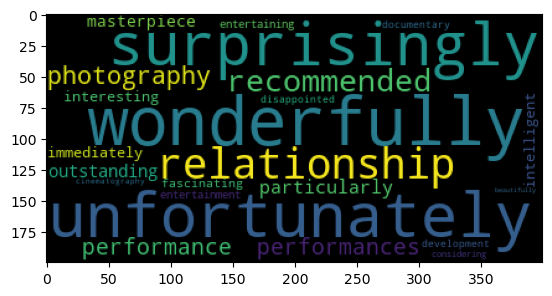

In [297]:
wc_positive = WordCloud(max_words=1000)
wc_positive.generate_from_frequencies(df_positive.set_index('word')['count'].sort_values(ascending=False))
plt.imshow(wc_positive)
plt.show()

**Negative Word Cloud**

In [298]:
cv_negative = CountVectorizer(max_features = 1000,binary = True)
cv_negative.fit_transform(dataset_review_negative['review'])

<25000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 1377076 stored elements in Compressed Sparse Row format>

In [299]:
# Filter out more words like youve, youd, youll, youre, youve, yes, yet, no since its common on positive and negative reviews and filter > 10 characters words
df_negative = pd.DataFrame(cv_negative.vocabulary_.items(),columns=['word','count'])
df_negative.sort_values(by='count', ascending=False).head(10)

,word,count
806,youve,999
16,youre,998
147,young,997
940,youll,996
726,youd,995
479,yet,994
206,yes,993
41,years,992
162,year,991
722,yeah,990


In [300]:
df_negative = df_negative[~df_negative['word'].isin(stop_words2)] 
df_negative = df_negative[df_negative['word'].str.len() > 10]
df_negative = df_negative.sort_values(by='count', ascending=False)

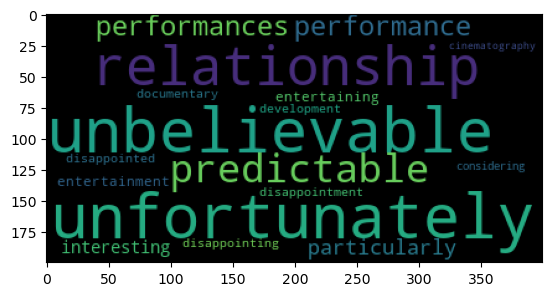

In [301]:
wc_negative = WordCloud(max_words=1000)
wc_negative.generate_from_frequencies(df_negative.set_index('word')['count'].sort_values(ascending=False))
plt.imshow(wc_negative)
plt.show()